In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import timeseries_acquire as ta
import timeseries_prepare as tp

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# acquire data
df_items = ta.acquire_df('items')
df_stores = ta.acquire_df('stores')
df_sales = ta.acquire_df('sales')
df_all_sales = ta.combine_data(df_sales, df_items, df_stores)

File already exists
File already exists
File already exists


In [11]:
# check data
df_all_sales

,sale_amount,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,63.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Wednesday,327.60
2017-12-28 00:00:00+00:00,59.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Thursday,306.80
2017-12-29 00:00:00+00:00,74.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Friday,384.80


In [4]:
# Check data
df_all_sales

,sale_amount,sale_date,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_id,,,,,,,,,,,
1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
5,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...
912996,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912997,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231
912998,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231


In [5]:
# prepare data
df_sales_data = tp.trinity_prep(df_all_sales)

In [28]:
# check data
df_sales_data

,sale_amount,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,63.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Wednesday,327.60
2017-12-28 00:00:00+00:00,59.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Thursday,306.80
2017-12-29 00:00:00+00:00,74.0,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Friday,384.80


In [29]:
# Split data into train and test
train = df_sales_data[:'2016'] # everything up (not including) to the test_start_index
test = df_sales_data['2017':] # everything from the test_start_index to the end

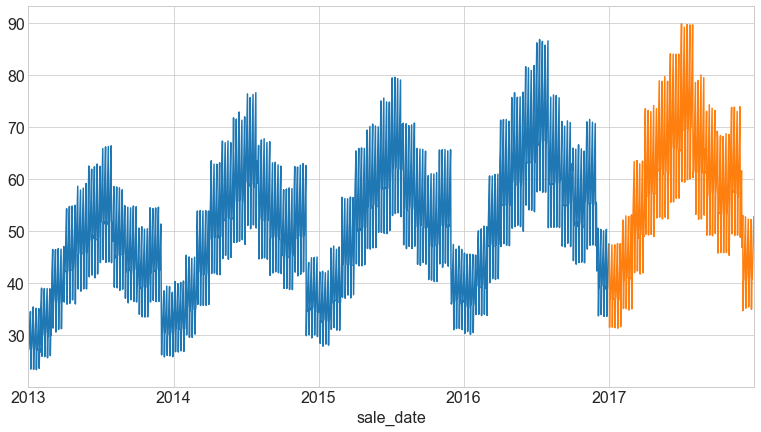

In [30]:
train.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot();

<AxesSubplot:xlabel='sale_date'>

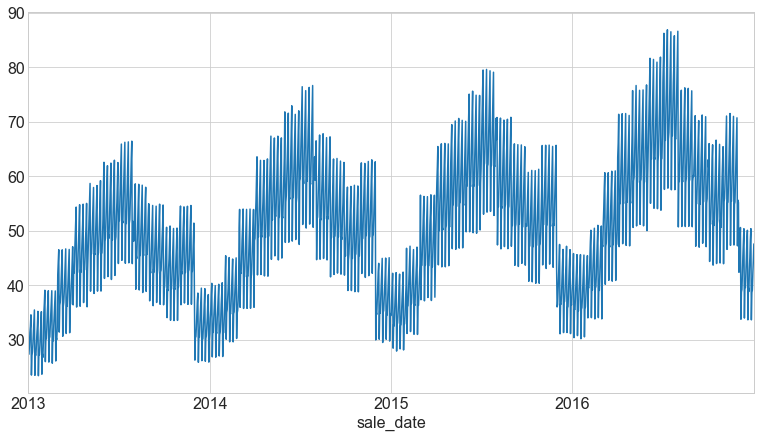

In [31]:
# plot sale amount
train.resample('D').sale_amount.mean().plot()

<AxesSubplot:xlabel='day_of_week', ylabel='sale_amount'>

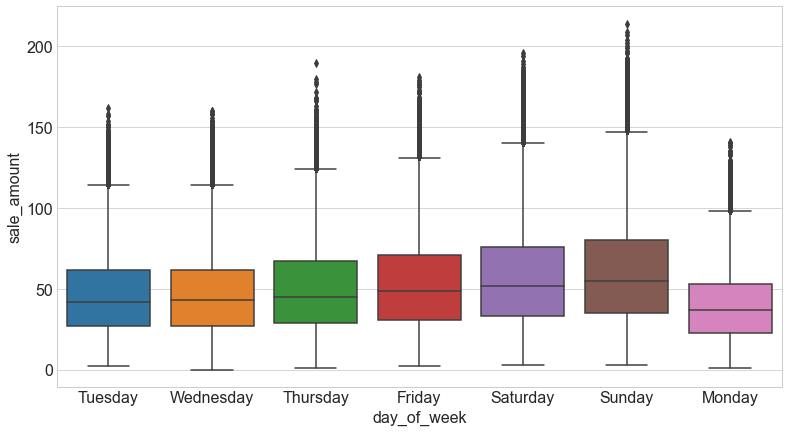

In [37]:
# Create a box plot of the sales amount for train
sns.boxplot(data=train, y='sale_amount', x='day_of_week')

In [39]:
# create a varible to hole y values for plotting
y = train.resample('D').sale_amount.mean()

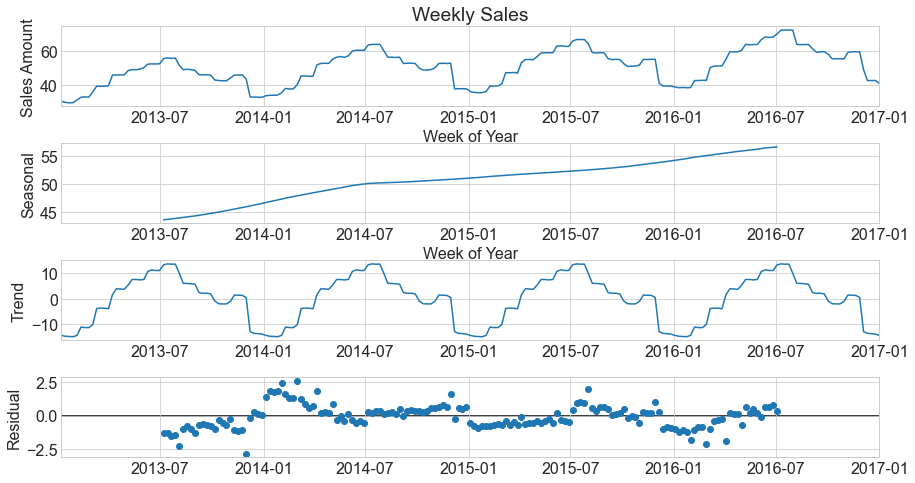

In [82]:
fig = sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
axs = fig.axes
axs[0].set_title('Weekly Sales')
axs[0].set_ylabel('Sales Amount')
axs[0].set_xlabel('Week of Year')
axs[1].set_ylabel('Seasonal')
axs[1].set_xlabel('Week of Year')
axs[2].set_ylabel('Trend')
axs[3].set_ylabel('Residual')
None

Text(0.5, 1.0, 'Biweekly Sales')

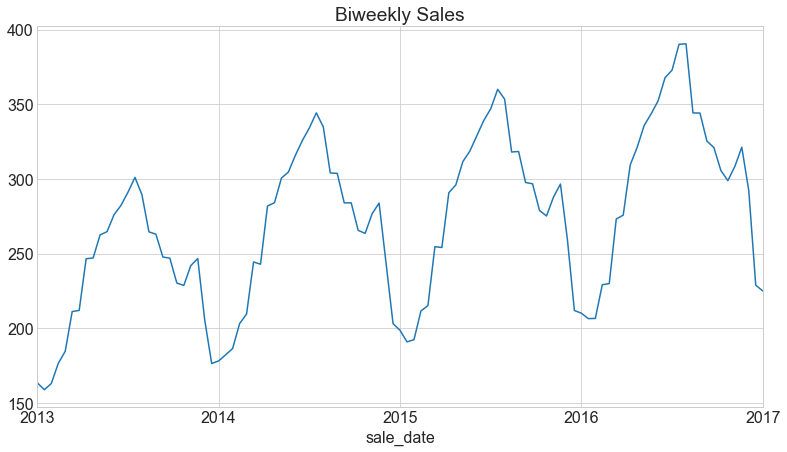

In [59]:
# group biweekly sales by day of week and plot
train['sales_total'].resample('2W').mean().plot()
plt.title('Biweekly Sales')

<AxesSubplot:xlabel='sale_date'>

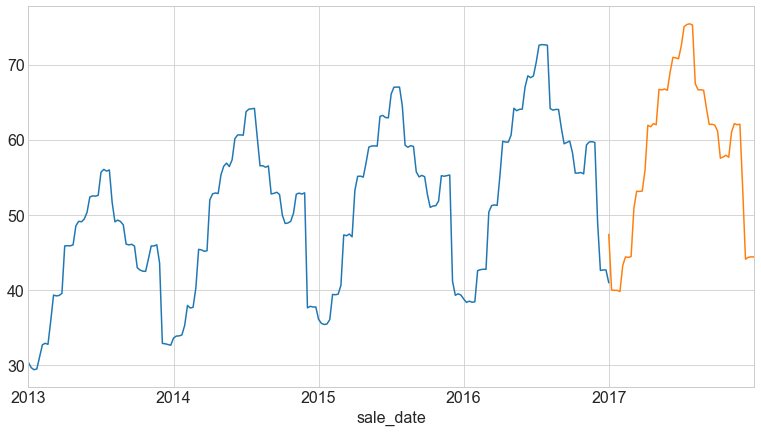

In [61]:
train.resample('W').sale_amount.mean().plot()
test.resample('W').sale_amount.mean().plot()

Text(0.5, 1.0, 'Sales Amount Over Time')

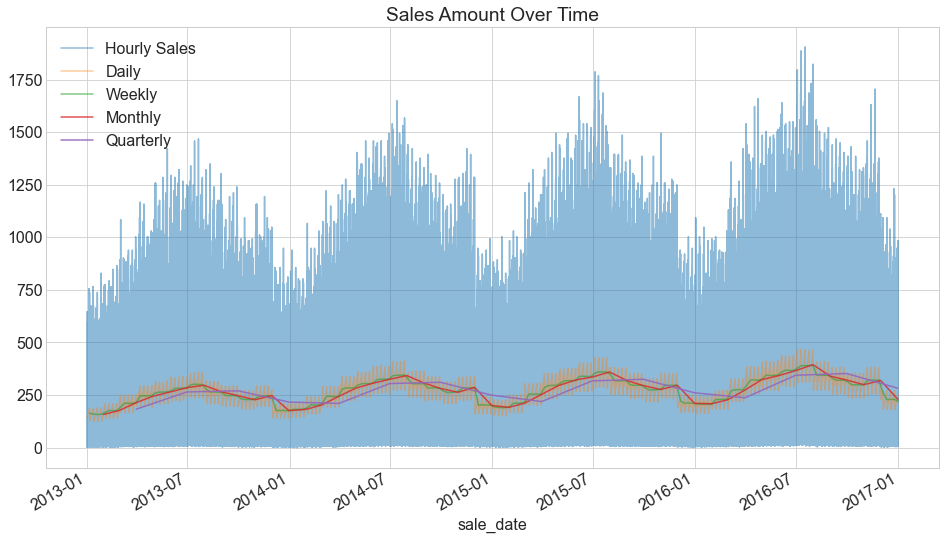

In [68]:
# visualize sales_amount over differnt measures of time
plt.figure(figsize=(16,9))
ax = train['sales_total'].plot(alpha=0.5, label='Hourly Sales')
train['sales_total'].resample('D').mean().plot(ax=ax, alpha=.4, label='Daily')
train['sales_total'].resample('W').mean().plot(ax=ax, alpha=.6, label='Weekly')
train['sales_total'].resample('M').mean().plot(ax=ax, alpha=.8, label='Monthly')
train['sales_total'].resample('Q').mean().plot(ax=ax, alpha=.9, label='Quarterly')
plt.legend(loc='best')
plt.title('Sales Amount Over Time')



In [69]:
train.head()

,sale_amount,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Saturday,8.40


<AxesSubplot:xlabel='store_address'>

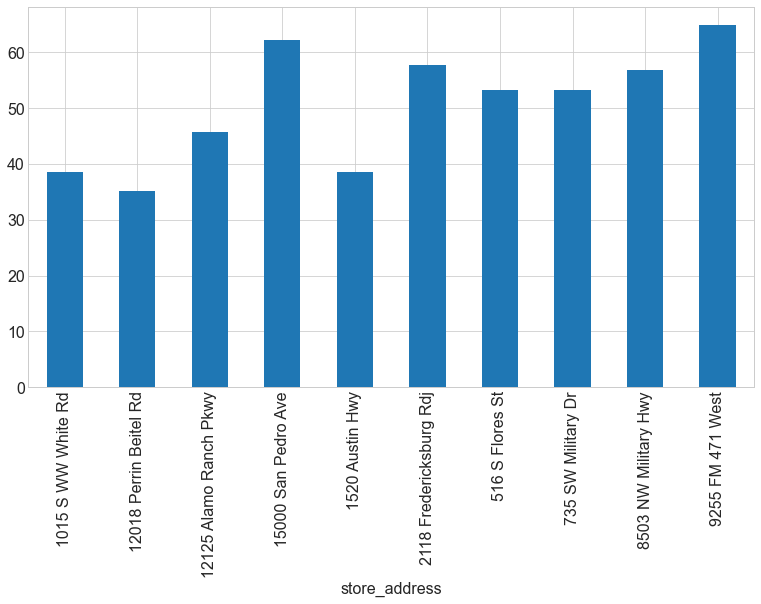

In [70]:
# group by store_address and plot the amount of sales
train.groupby('store_address').sale_amount.mean().plot(kind='bar')
plt.title('Sales by Store Address')


Text(0.5, 1.0, 'Sales by Item Name')

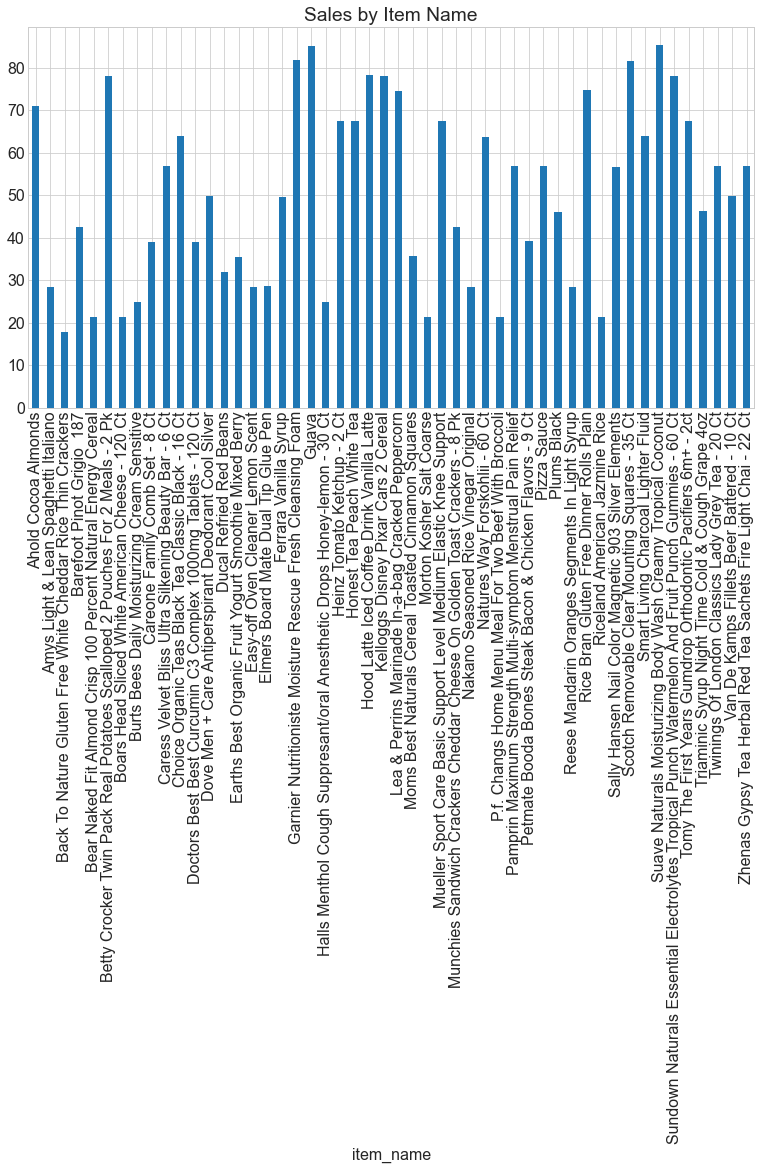

In [74]:
# group by item_name and plot the amount of sales
train.groupby('item_name').sale_amount.mean().plot(kind='bar')
plt.title('Sales by Item Name')


Text(0, 0.5, 'Sales Amount')

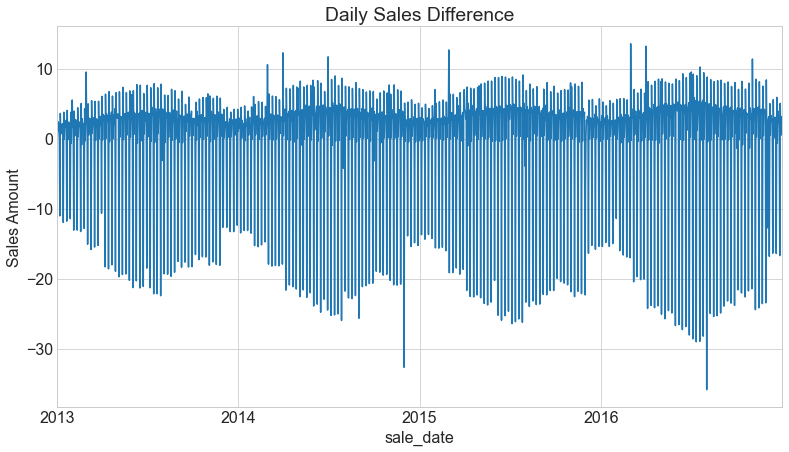

In [78]:
# plot the difference
y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Sales Amount')
